In [9]:
import requests
import json
import openai
import os

from dotenv import load_dotenv
from pathlib import Path

dotenv_path = Path('secrets.env')
load_dotenv(dotenv_path=dotenv_path)

openai_api_key = os.environ.get("OPENAI_API_KEY")

In [11]:
def make_gpt_request(text):
    r = requests.post(
        "https://api.openai.com/v1/engines/text-davinci-003-playground/completions",
        data=json.dumps({
            "prompt": text,
            "max_tokens":256,
            "temperature":0.7,
            "top_p":1,
            "frequency_penalty":0,
            "presence_penalty":0,
            "best_of":1,
            "echo":False,
            "logprobs":0,
            "stream":False
            }),
        headers={
            "authorization": "Bearer {}".format(openai_api_key),
            "content-type": "application/json"
        }
    )
    return r
    
r = make_gpt_request("considering a dataframe with columns id, name, age and gender plot average age by gender")
r.text

'{"id":"cmpl-6N6GwlDrBaoyyGd75N6y3rSHnGqyn","object":"text_completion","created":1670963674,"model":"text-davinci-003-playground","choices":[{"text":"\\n\\nimport pandas as pd\\n\\ndata = {\\n    \'id\': [1, 2, 3, 4, 5],\\n    \'name\': [\\"Bob\\", \\"Sue\\", \\"John\\", \\"Jane\\", \\"Jill\\"],\\n    \'age\': [20, 21, 22, 23, 24],\\n    \'gender\': [\\"M\\", \\"F\\", \\"M\\", \\"F\\", \\"F\\"]\\n}\\n\\ndf = pd.DataFrame(data)\\n\\ndf.groupby(\'gender\').mean()[\'age\'].plot.bar()","index":0,"logprobs":{"tokens":["\\n","\\n","import"," pand","as"," as"," p","d","\\n","\\n","data"," ="," {","\\n","   "," \'","id","\':"," [","1",","," 2",","," 3",","," 4",","," 5","],","\\n","   "," \'","name","\':"," [\\"","Bob","\\","," \\"","S","ue","\\","," \\"","John","\\","," \\"","Jane","\\","," \\"","J","ill","\\"],","\\n","   "," \'","age","\':"," [","20",","," 21",","," 22",","," 23",","," 24","],","\\n","   "," \'","gender","\':"," [\\"","M","\\","," \\"","F","\\","," \\"","M","\\","," \\"","F

In [12]:
openai._parse_gpt_response(r)

('\n\nimport pandas as pd\n\ndata = {\n    \'id\': [1, 2, 3, 4, 5],\n    \'name\': ["Bob", "Sue", "John", "Jane", "Jill"],\n    \'age\': [20, 21, 22, 23, 24],\n    \'gender\': ["M", "F", "M", "F", "F"]\n}\n\ndf = pd.DataFrame(data)\n\ndf.groupby(\'gender\').mean()[\'age\'].plot.bar()',
 'stop')

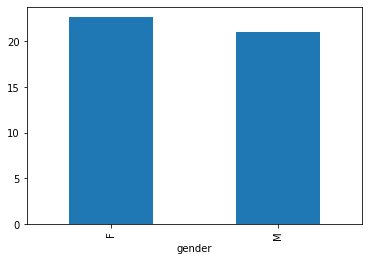

In [14]:
exec(openai._parse_gpt_response(r)[0])

In [3]:
chart_resp = make_gpt_request("considering a dataframe with columns age and gender, plot the average age for each gender")
resp = parse_gpt_response(chart_resp)
print(resp)




NameError: name 'make_gpt_request' is not defined

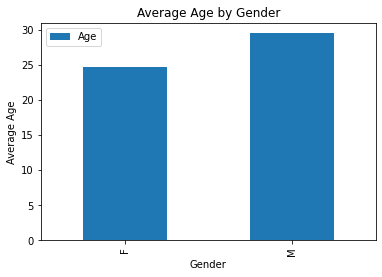

In [ ]:
exec(resp[0])



import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Age': [30, 24, 25, 29, 28, 25, 31],
                   'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'M']})

grouped_df = df.groupby('Gender').mean()

grouped_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age by Gender')



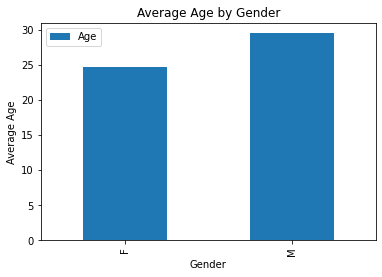

In [ ]:
plt = None
d = resp[0].replace("plt.show()", "")
print(d)
exec(d, None, {"plt": plt})
# p